Load data

In [79]:
import pandas as pd

In [80]:
data = pd.read_csv('application_train.csv')
data.sample()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
37380,143300,0,Cash loans,F,N,Y,0,180000.0,585000.0,46350.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0


In [81]:
data.shape

(307511, 122)

## Preprocessing

Make a copy so that we can always go back to the original data.  

In [82]:
df = data.copy()
df = df.rename(columns=lambda x: x.lower())
df.sample()

,sk_id_curr,target,name_contract_type,code_gender,flag_own_car,flag_own_realty,cnt_children,amt_income_total,amt_credit,amt_annuity,...,flag_document_18,flag_document_19,flag_document_20,flag_document_21,amt_req_credit_bureau_hour,amt_req_credit_bureau_day,amt_req_credit_bureau_week,amt_req_credit_bureau_mon,amt_req_credit_bureau_qrt,amt_req_credit_bureau_year
161351,287053,0,Cash loans,F,N,Y,0,81000.0,110331.0,11713.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0


We decided to keep only those few columns that are strongly correlated with the target.  We had decided on the following features/columns.  

In [83]:
col_num = ['ext_source_3',
           'ext_source_2',
           'ext_source_1',
           'days_birth',
           'region_rating_client_w_city',
           'days_last_phone_change',
           'days_id_publish',
           'reg_city_not_work_city',
           'flag_emp_phone',
           'reg_city_not_live_city',
           'flag_document_3',
           'floorsmax_avg'
          ]

col_cat = ['name_education_type',
           'name_income_type']

Ensure that the column names are spelled correctly.  

continuous

In [84]:
sum(col in df.columns for col in col_num) == len(col_num)

True

discrete

In [85]:
sum(col in df.columns for col in col_cat) == len(col_cat)

True

And these are all we need ... for now.  

In [86]:
cols = col_num + col_cat + ['target']
len(cols)

15

In [87]:
df = df[cols]
df.sample()

,ext_source_3,ext_source_2,ext_source_1,days_birth,region_rating_client_w_city,days_last_phone_change,days_id_publish,reg_city_not_work_city,flag_emp_phone,reg_city_not_live_city,flag_document_3,floorsmax_avg,name_education_type,name_income_type,target
163342,0.528093,0.151341,0.727588,-20840,2,0.0,-3608,1,1,0,1,NaN,Secondary / secondary special,Working,0


In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 15 columns):
ext_source_3                   246546 non-null float64
ext_source_2                   306851 non-null float64
ext_source_1                   134133 non-null float64
days_birth                     307511 non-null int64
region_rating_client_w_city    307511 non-null int64
days_last_phone_change         307510 non-null float64
days_id_publish                307511 non-null int64
reg_city_not_work_city         307511 non-null int64
flag_emp_phone                 307511 non-null int64
reg_city_not_live_city         307511 non-null int64
flag_document_3                307511 non-null int64
floorsmax_avg                  154491 non-null float64
name_education_type            307511 non-null object
name_income_type               307511 non-null object
target                         307511 non-null int64
dtypes: float64(5), int64(8), object(2)
memory usage: 35.2+ MB


Looks like some of the columns have missing values.  (We already knew this!)  Let's just collect the names in a list.  HINT: They are all continuous!  

### Imputing missing values

In [89]:
has_null = [col for col in df.columns 
            if sum(df[col].isnull())]

len(has_null)

5

For simplicity, let's just replace the missing values by the means of their corresponding columns.  

In [90]:
for col in has_null:
    df[col].fillna(df[col].mean(), inplace=True)

Let's just check that there is no missing value.  

In [91]:
has_null = [col for col in df.columns 
            if sum(df[col].isnull())]

len(has_null)

0

### OneHotEncoding   

In [92]:
for col in col_cat:
    dummy = pd.get_dummies(df[col], prefix=col+'_')
    df = df.join(dummy)
    
df.sample()

,ext_source_3,ext_source_2,ext_source_1,days_birth,region_rating_client_w_city,days_last_phone_change,days_id_publish,reg_city_not_work_city,flag_emp_phone,reg_city_not_live_city,...,name_education_type__Lower secondary,name_education_type__Secondary / secondary special,name_income_type__Businessman,name_income_type__Commercial associate,name_income_type__Maternity leave,name_income_type__Pensioner,name_income_type__State servant,name_income_type__Student,name_income_type__Unemployed,name_income_type__Working
8965,0.703203,0.473719,0.50213,-16665,2,0.0,-202,0,1,0,...,0,1,0,0,0,0,0,0,0,1


In [93]:
df = df.drop(col_cat, axis=1)
df.shape

(307511, 26)

## Subsampling

In [94]:
df['target'].value_counts()

0    282686
1     24825
Name: target, dtype: int64

In [95]:
ones = (df['target'] == 1).sum()
ones

24825

In [96]:
df_0 = df[df['target'] == 0].sample(ones)
df_0.sample()

,ext_source_3,ext_source_2,ext_source_1,days_birth,region_rating_client_w_city,days_last_phone_change,days_id_publish,reg_city_not_work_city,flag_emp_phone,reg_city_not_live_city,...,name_education_type__Lower secondary,name_education_type__Secondary / secondary special,name_income_type__Businessman,name_income_type__Commercial associate,name_income_type__Maternity leave,name_income_type__Pensioner,name_income_type__State servant,name_income_type__Student,name_income_type__Unemployed,name_income_type__Working
41914,0.510853,0.688609,0.50213,-21889,2,-1517.0,-4192,0,0,0,...,0,1,0,0,0,1,0,0,0,0


In [97]:
df_0.shape

(24825, 26)

In [98]:
df_sub = df_0.append(df[df['target'] == 1])
df_sub = pd.DataFrame(df_sub)
df_sub.sample()

,ext_source_3,ext_source_2,ext_source_1,days_birth,region_rating_client_w_city,days_last_phone_change,days_id_publish,reg_city_not_work_city,flag_emp_phone,reg_city_not_live_city,...,name_education_type__Lower secondary,name_education_type__Secondary / secondary special,name_income_type__Businessman,name_income_type__Commercial associate,name_income_type__Maternity leave,name_income_type__Pensioner,name_income_type__State servant,name_income_type__Student,name_income_type__Unemployed,name_income_type__Working
14019,0.355639,0.510202,0.311051,-23361,3,-764.0,-4911,0,0,0,...,0,1,0,0,0,1,0,0,0,0


In [99]:
df_sub.shape

(49650, 26)

In [100]:
y = df_sub['target']
X = df_sub.drop('target', axis=1)

In [101]:
X.shape

(49650, 25)

## Training set

In [102]:
from sklearn.model_selection import train_test_split

In [103]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y)

## Modeling and evaluation

### Naive Bayes

In [104]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(Xtrain, ytrain)
ypred = gnb.predict(Xtest)

Accuracy score

In [105]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, ypred)

0.6257149762345927

Confusion matrix

In [106]:
from sklearn.metrics import confusion_matrix
con_mat = confusion_matrix(ytest, ypred)
con_mat

array([[3574, 2609],
       [2037, 4193]])

In [107]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

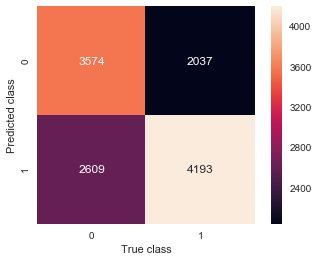

In [108]:
sns.heatmap(con_mat.T, 
            square=True, 
            annot=True, 
            fmt='d', 
            cbar=True,
            xticklabels=[0, 1], 
            yticklabels=[0, 1])

plt.xlabel('True class')
plt.ylabel('Predicted class');

Classification report

In [109]:
from sklearn.metrics import classification_report
print(classification_report(ytest, ypred))

             precision    recall  f1-score   support

          0       0.64      0.58      0.61      6183
          1       0.62      0.67      0.64      6230

avg / total       0.63      0.63      0.62     12413



ROC curve score

In [110]:
roc_auc_score(ytest, ypred)

0.6255351298504235

### Logistic regression

In [111]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(Xtrain, ytrain)
ypred = lr.predict(Xtest)

Accuracy score

In [112]:
#from sklearn.metrics import accuracy_score
accuracy_score(ytest, ypred)

0.658664303552727

Confusion matrix

In [113]:
#from sklearn.metrics import confusion_matrix
con_mat = confusion_matrix(ytest, ypred)
con_mat

array([[4150, 2033],
       [2204, 4026]])

In [114]:
#import matplotlib.pyplot as plt
#%matplotlib inline
#import seaborn as sns
#sns.set()

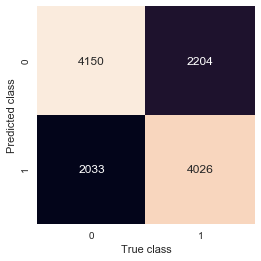

In [115]:
sns.heatmap(con_mat.T, 
            square=True, 
            annot=True, 
            fmt='d', 
            cbar=False,
            xticklabels=[0, 1], 
            yticklabels=[0, 1])

plt.xlabel('True class')
plt.ylabel('Predicted class');

Classification report

In [116]:
#from sklearn.metrics import classification_report
print(classification_report(ytest, ypred))

             precision    recall  f1-score   support

          0       0.65      0.67      0.66      6183
          1       0.66      0.65      0.66      6230

avg / total       0.66      0.66      0.66     12413



ROC curve score

In [117]:
#from sklearn.metrics import roc_auc_score
roc_auc_score(ytest, ypred)

0.6587115710269627

### Random Forest

In [118]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(Xtrain, ytrain)
ypred = rf.predict(Xtest)

Accuracy score

In [119]:
accuracy_score(ytest, ypred)

0.6367517924756304

Confusion matrix

In [120]:
con_mat = confusion_matrix(ytest, ypred)
con_mat

array([[4385, 1798],
       [2711, 3519]])

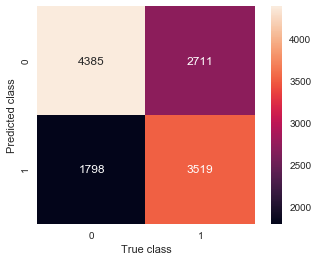

In [121]:
sns.heatmap(con_mat.T, 
            square=True, 
            annot=True, 
            fmt='d', 
            cbar=True,
            xticklabels=[0, 1], 
            yticklabels=[0, 1])

plt.xlabel('True class')
plt.ylabel('Predicted class');

Classification report

In [122]:
print(classification_report(ytest, ypred))

             precision    recall  f1-score   support

          0       0.62      0.71      0.66      6183
          1       0.66      0.56      0.61      6230

avg / total       0.64      0.64      0.63     12413



ROC curve score

In [123]:
roc_auc_score(ytest, ypred)

0.6370250822363084

### adaboost

In [124]:
from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier(n_estimators=100)
abc.fit(Xtrain, ytrain)
ypred = abc.predict(Xtest)

Accuracy score

In [125]:
accuracy_score(ytest, ypred)

0.6712317731410617

Confusion matrix

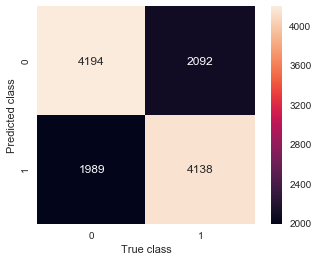

In [126]:
con_mat = confusion_matrix(ytest, ypred)
sns.heatmap(con_mat.T, 
            square=True, 
            annot=True, 
            fmt='d', 
            cbar=True,
            xticklabels=[0, 1], 
            yticklabels=[0, 1])

plt.xlabel('True class')
plt.ylabel('Predicted class');

Classification report

In [127]:
print(classification_report(ytest, ypred))

             precision    recall  f1-score   support

          0       0.67      0.68      0.67      6183
          1       0.68      0.66      0.67      6230

avg / total       0.67      0.67      0.67     12413



ROC score

In [128]:
roc_auc_score(ytest, ypred)

0.6712584783680412

#### GBT 

In [129]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
gbc.fit(Xtrain, ytrain)
ypred = gbc.predict(Xtest)

Accuracy

In [130]:
accuracy_score(ytest, ypred)

0.6709095303311045

Confusion matrix

Text(84.4,0.5,'Predicted class')

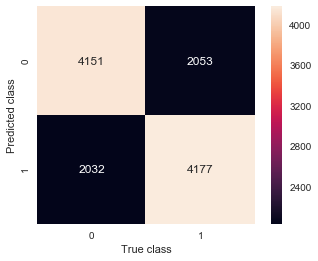

In [131]:
con_mat = confusion_matrix(ytest, ypred)
sns.heatmap(con_mat.T, 
            square=True, 
            annot=True, 
            fmt='d', 
            cbar=True,
            xticklabels=[0, 1], 
            yticklabels=[0, 1])

plt.xlabel('True class')
plt.ylabel('Predicted class')

Classification report

In [132]:
print(classification_report(ytest, ypred))

             precision    recall  f1-score   support

          0       0.67      0.67      0.67      6183
          1       0.67      0.67      0.67      6230

avg / total       0.67      0.67      0.67     12413



ROC curve score

In [133]:
print(roc_auc_score(ytest, ypred))

0.670911218016365


Feature importance

In [134]:
fi = pd.DataFrame({'variable': list(Xtrain.columns), 
                   'importance': gbc.feature_importances_})

fi = fi.sort_values(by='importance', ascending=False)
fi.tail()

,importance,variable
8,0.0,flag_emp_phone
17,0.0,name_income_type__Businessman
19,0.0,name_income_type__Maternity leave
22,0.0,name_income_type__Student
23,0.0,name_income_type__Unemployed


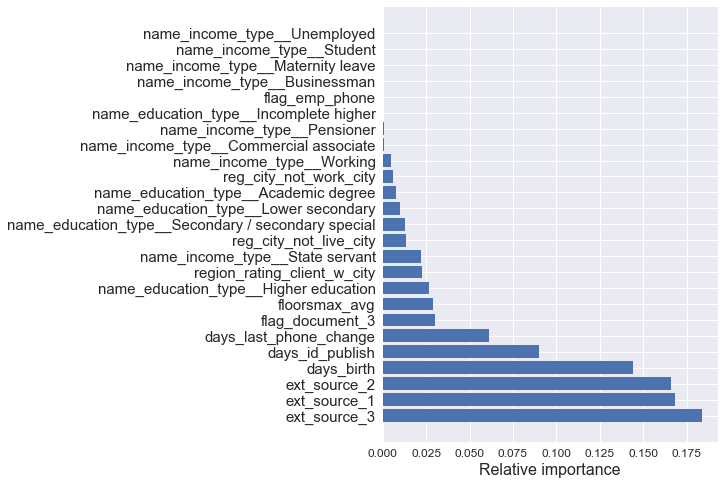

In [135]:
how_many = fi.shape[0]
plt.figure(figsize=(6,8))
plt.barh(range(how_many), fi['importance'].head(how_many))
plt.yticks(range(how_many), fi['variable'].head(how_many), size=15)
plt.xticks(size=12)
plt.xlabel('Relative importance', size=16)
plt.show()

## Hyperparameter tuning

#### Adaboost

In [136]:
from sklearn.model_selection import GridSearchCV

gbc = AdaBoostClassifier()
param_grid = [{'learning_rate': [0.1, 1.0]},
              {'n_estimators': [50, 100, 200]}]

gs = GridSearchCV(gbc, 
                 param_grid,
                 cv=5,
                 scoring='f1')

gs.fit(Xtrain, ytrain)

GridSearchCV(cv=5, error_score='raise',
       estimator=AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'learning_rate': [0.1, 1.0]}, {'n_estimators': [50, 100, 200]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1', verbose=0)

Best parameters

In [137]:
gs.best_params_

{'n_estimators': 200}

Best estimator

In [138]:
gs.best_estimator_

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=200, random_state=None)

ROC score

In [139]:
model = gs.best_estimator_
model.fit(Xtrain, ytrain)
ypred = model.predict(Xtest)
roc_auc_score(ytest, ypred)

0.6719740789806047

#### GBT

In [344]:
from sklearn.model_selection import GridSearchCV

gbc = GradientBoostingClassifier()
param_grid = [{'learning_rate': [0.1, 1.0]},
              {'n_estimators': [100, 200]},
              {'max_depth': [3, 5, 7]}]

gs = GridSearchCV(gbc, 
                 param_grid,
                 cv=5,
                 scoring='f1')

gs.fit(Xtrain, ytrain)

GridSearchCV(cv=5, error_score='raise',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'learning_rate': [0.1, 1.0]}, {'n_estimators': [100, 200]}, {'max_depth': [3, 5, 7]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1', verbose=0)

Best parameters

In [345]:
gs.best_params_

{'n_estimators': 100}

Best estimator

In [346]:
gs.best_estimator_

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

ROC score

In [347]:
model = gs.best_estimator_
model.fit(Xtrain, ytrain)
ypred = model.predict(Xtest)
roc_auc_score(ytest, ypred)

0.6961255390014834

Feature importance

In [348]:
fi = pd.DataFrame({'variable': list(Xtrain.columns), 
                   'importance': model.feature_importances_})

fi = fi.sort_values(by='importance', ascending=False)
fi.head()

,importance,variable
0,0.195708,EXT_SOURCE_3
2,0.179987,EXT_SOURCE_1
1,0.158965,EXT_SOURCE_2
3,0.142166,DAYS_BIRTH
6,0.132443,DAYS_ID_PUBLISH


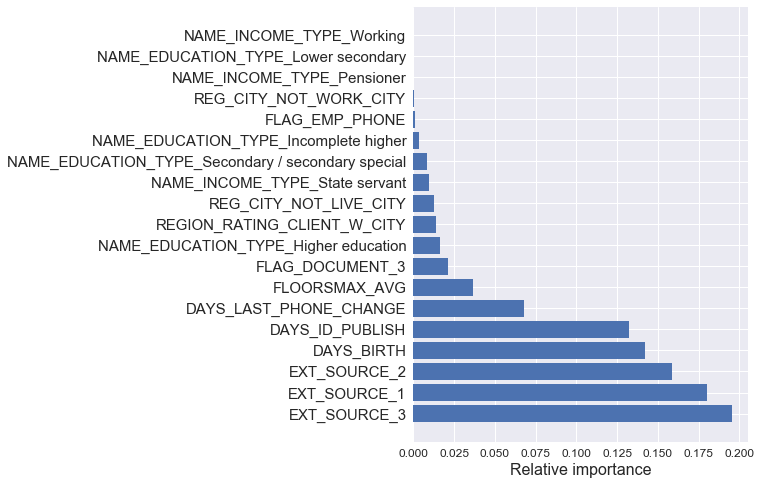

In [349]:
how_many = fi.shape[0]
plt.figure(figsize=(6,8))
plt.barh(range(how_many), fi['importance'].head(how_many))
plt.yticks(range(how_many), fi['variable'].head(how_many), size=15)
plt.xticks(size=12)
plt.xlabel('Relative importance', size=16)
plt.show()

#### Logistic Regression

In [350]:
from sklearn.model_selection import GridSearchCV

param_grid = {'penalty': ['l1', 'l2'],
              'C': [0.10, 1.0, 10., 100.],
              'fit_intercept': [False, True],
              'max_iter': [50, 100, 200]}

gs = GridSearchCV(estimator=LogisticRegression(),
                 param_grid = param_grid,
                 scoring='accuracy',
                 cv=5)

gs.fit(Xtrain, ytrain)

GridSearchCV(cv=5, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'penalty': ['l1', 'l2'], 'C': [0.1, 1.0, 10.0, 100.0], 'fit_intercept': [False, True], 'max_iter': [50, 100, 200]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

Best parameters

In [351]:
gs.best_params_

{'C': 0.1, 'fit_intercept': True, 'max_iter': 100, 'penalty': 'l1'}

Best estimator

In [352]:
gs.best_estimator_

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

ROC score

In [353]:
model = gs.best_estimator_
model.fit(Xtrain, ytrain)
ypred = model.predict(Xtest)
roc_auc_score(ytest, ypred)

0.698386026079879